In [1]:
import os
import numpy as np
import PIL
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.models import vgg16
from torchvision.io import read_image
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [2]:
def downloadData():
  !gdown --id 1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q
  !unzip Cyclone_Wildfire_Flood_Earthquake_Database.zip
downloadData()

Downloading...
From: https://drive.google.com/uc?id=1NvTyhUsrFbL91E10EPm38IjoCg6E2c6q
To: /content/Cyclone_Wildfire_Flood_Earthquake_Database.zip
1.90GB [00:16, 114MB/s] 
Archive:  Cyclone_Wildfire_Flood_Earthquake_Database.zip
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/
   creating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/0.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/1.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/10.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/100.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/101.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/102.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/103.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/104.jpg  
  inflating: Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone

In [70]:
imagesPaths = []
labels = []
IDs = []
subdirs = []
Files = []
for subdir, dirs, files in os.walk('/content/Cyclone_Wildfire_Flood_Earthquake_Database'):
  subdirs.append(subdir)
  Files.append(files)

In [71]:
print(subdirs)
print(Files)

['/content/Cyclone_Wildfire_Flood_Earthquake_Database', '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake', '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire', '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone', '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Flood']
[['readme.txt'], ['166.jpg', '353.jpg', '302.jpg', '766.jpg', '1213.jpg', '1278.jpg', '306.jpg', '1174.jpg', '1066.jpg', '384.jpg', '813.jpg', '498.jpg', '212.jpg', '745.jpg', '626.jpg', '1325.jpg', '815.jpg', '32.jpg', '603.jpg', '135.jpg', '1292.jpg', '681.jpg', '686.jpg', '507.jpg', '1304.jpg', '1307.jpg', '486.jpg', '34.jpg', '266.jpg', '67.jpg', '735.jpg', '61.jpg', '12.jpg', '1272.jpg', '443.jpg', '547.jpg', '945.jpg', '1038.jpg', '439.jpg', '652.jpg', '876.jpg', '1299.jpg', '1040.jpg', '1137.jpg', '442.jpg', '721.jpg', '430.jpg', '1051.jpg', '388.jpg', '434.jpg', '124.jpg', '283.jpg', '355.jpg', '599.jpg', '451.jpg', '1090.jpg', '484.jpg', '395.jpg', '869.jpg', '587.jpg', '2

In [72]:
for image in Files[1]:
  PATH = subdirs[1] + "/" + image
  imagesPaths.append(PATH)
  labels.append(0) # Earthquake 

for image in Files[2]:
  PATH = subdirs[2] + "/" + image
  imagesPaths.append(PATH)
  labels.append(1) # Wildfire

for image in Files[3]:
  PATH = subdirs[3] + "/" + image
  imagesPaths.append(PATH)
  labels.append(2) # Cyclone

for image in Files[4]:
  PATH = subdirs[4] + "/" + image
  imagesPaths.append(PATH)
  labels.append(3) # Cyclone
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [73]:
for i in range(len(labels)):
  IDs.append(i)

In [74]:
df_dict = {"IDs" : IDs, "images" : imagesPaths, "labels" : labels}
df = pd.DataFrame(df_dict)
df.head()

,IDs,images,labels
0,0,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,0
1,1,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,0
2,2,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,0
3,3,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,0
4,4,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,0


In [75]:
# Shuffling
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,IDs,images,labels
0,1958,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,1
1,739,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,0
2,2697,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,2
3,169,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,0
4,1378,/content/Cyclone_Wildfire_Flood_Earthquake_Dat...,1


In [76]:
X = df['images'].values
Y = df['labels'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [11]:
print(X_train[0:50])

['/content/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/874.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/1015.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/409.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Flood/242.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/1282.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/241.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Earthquake/1292.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire/424.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire/927.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire/266.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire/256.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone/605.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire/914.jpg'
 '/content/Cyclone_Wildfire_Flood_Earthquake_Database

In [93]:
class DisasterDataset(Dataset):
  def __init__(self, images_path, targets, tranform=None, target_transform=None):
    self.imagePaths = images_path
    self.target = torch.tensor(targets)
    self.transform = transform
    self.target_transform = target_transform
  
  def __len__(self):
    return len(self.imagePaths)
  
  def __getitem__(self, i):
    imagePath = self.imagePaths[i]
    imageLabel = self.target[i]
    image = read_image(imagePath)

    if self.transform:
      image = self.transform(image)
    if self.target_transform != None:
      imageLabel = self.target_transform(imageLabel)
    
    sample = {"image" : image, "label" : imageLabel}
    return sample

In [94]:
def transform(image):
    # Resize

        imageTransform= transforms.Compose([
        transforms.Resize(size=(256, 256)),
        ])


        image= imageTransform(image)

        return image

In [95]:
disasterDataset_train = DisasterDataset(X_train, y_train, transform)
disasterDataset_test = DisasterDataset(X_test, y_test, transform)

In [96]:
trainDataLoader = DataLoader(disasterDataset_train, batch_size=64)
testDataLoader = DataLoader(disasterDataset_test)

In [82]:
pre_trained = vgg16(pretrained=True)

In [83]:
pre_trained.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [84]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [85]:
set_parameter_requires_grad(pre_trained, True)

In [97]:
class CNN_Model(nn.Module):
  def __init__(self, pre_trained):
    super(CNN_Model,self).__init__()
    
    self.fc1 = nn.Linear(1000, 256)
    self.fc2 = nn.Linear(256, 256)
    self.outputlayer = nn.Linear(256, 4)
    self.pre_trained = pre_trained

  def forward(self, x):
    assert(x.shape, (64,3, 256, 256))
    x1 = self.pre_trained(x)
    firstLayer = self.fc1(x1)
    secondLayer = F.relu(self.fc2(firstLayer))
    return self.outputlayer(secondLayer)


# Create Instance of the model
model = CNN_Model(pre_trained)
model.to('cuda')

<ipython-input-97-7c980d3dfb21>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape, (64,3, 256, 256))


CNN_Model(
  (fc1): Linear(in_features=1000, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (outputlayer): Linear(in_features=256, out_features=4, bias=True)
  (pre_trained): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kern

In [98]:
EPOCHS = 10
L_R = 0.0001

In [99]:
cretation = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = L_R)

In [100]:
def train(trainDataLoader, epochs):
  losses = []
  for epoch in tqdm(range(epochs)):
    for trainData in trainDataLoader:
      data = torch.tensor(trainData['image']).to('cuda')
      data = data.float()
      target = torch.tensor(trainData['label']).to('cuda')
      optimizer.zero_grad()
      y_hat = model.forward(data)
      loss = cretation(y_hat, target)
      losses.append(loss)
      loss.backward()
      optimizer.step
  return losses

In [101]:
losses = train(trainDataLoader, EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
100%|██████████| 10/10 [08:16<00:00, 49.64s/it]


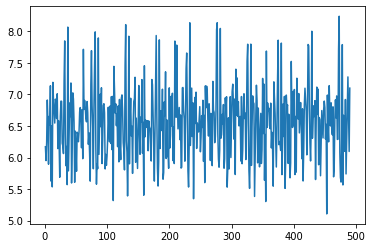

In [103]:
epochs = np.linspace(1, 490, 490)
plt.plot(epochs, losses)
plt.show()